<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/template/%5Bkaggle%5Dx_ray_chest_kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle --upgrade
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/data/.kaggle/"   
from google.colab import drive  
drive.mount('/content/gdrive')  
!cd "/content/gdrive/My Drive/data/.kaggle"
# !kaggle datasets download -d chest-xray-pneumonia.zip
!unzip chest-xray-pneumonia.zip
!ls  

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2,EfficientNetB3,EfficientNetB4

# 전이 학습

In [ ]:
preprocessor = efficientnet.preprocess_input

def build_model():
    global preprocessor
    model = models.Sequential()
    
    conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    conv_layers.trainable = False
    model.add(conv_layers)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
    model.summary()
    return model

In [ ]:
def build_model_A():
    global preprocessor
    model = models.Sequential()
    
    conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    conv_layers.trainable = False
    model.add(conv_layers)
    model.add(Flatten())
    model.add(Dense(256, activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc']) # EfficientNetB2
    model.summary()
    return model
    return model

def build_model_B():
    global preprocessor
    model = models.Sequential()
    
    conv_layers = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # EfficientNetB3
    conv_layers.trainable = False
    model.add(conv_layers)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
    model.summary()
    return model
    return model

def build_model_C():
    global preprocessor
    model = models.Sequential()
    
    conv_layers = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # EfficientNetB4
    conv_layers.trainable = False
    model.add(conv_layers)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
    model.summary()
    return model
    return model

# Deeplearning K-fold

In [ ]:
model_list = []
model_list.append(build_model_A())
model_list.append(build_model_B())
model_list.append(build_model_C())

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 25,434,371
Trainable params: 17,665,290
Non

In [ ]:
!ls chest_xray

chest_xray  __MACOSX  test  train  val


In [ ]:
BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "chest_xray/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "chest_xray/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "chest_xray/val",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
from re import VERBOSE
history_list = []

for i in range(3):
    print(i,"model train start!!")
    history_list.append(model_list[i].fit(
          train_data_generator,
          validation_data=valid_data_generator,
          epochs= 10
    ))

0 model train start!!
Epoch 1/10
82/82 [==============================] - 90s 1s/step - loss: 0.0525 - acc: 0.9806 - val_loss: 0.0395 - val_acc: 1.0000
Epoch 2/10
82/82 [==============================] - 90s 1s/step - loss: 0.0382 - acc: 0.9864 - val_loss: 0.2658 - val_acc: 0.8750
Epoch 3/10
82/82 [==============================] - 90s 1s/step - loss: 0.0451 - acc: 0.9837 - val_loss: 0.6602 - val_acc: 0.7500
Epoch 4/10
82/82 [==============================] - 91s 1s/step - loss: 0.0481 - acc: 0.9824 - val_loss: 0.1600 - val_acc: 0.9375
Epoch 5/10
82/82 [==============================] - 90s 1s/step - loss: 0.0349 - acc: 0.9870 - val_loss: 0.0503 - val_acc: 0.9375
Epoch 6/10
82/82 [==============================] - 90s 1s/step - loss: 0.0429 - acc: 0.9820 - val_loss: 0.0742 - val_acc: 0.9375
Epoch 7/10
82/82 [==============================] - 90s 1s/step - loss: 0.0408 - acc: 0.9849 - val_loss: 0.3233 - val_acc: 0.8750
Epoch 8/10
82/82 [==============================] - 91s 1s/step - lo

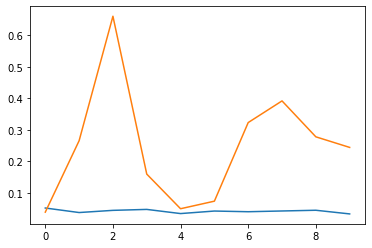

10/10 [==============================] - 5s 505ms/step - loss: 0.6721 - acc: 0.8526
loss= 0.6720775365829468
acc= 0.8525640964508057


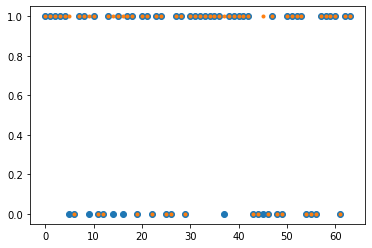

label category index = 1.0
predicted category index = 1
predicted category name = PNEUMONIA


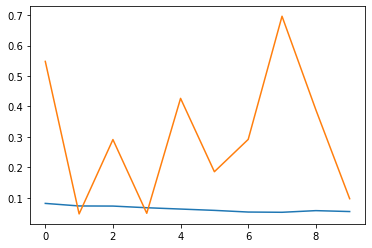

10/10 [==============================] - 5s 513ms/step - loss: 0.3886 - acc: 0.8766
loss= 0.3885936141014099
acc= 0.8766025900840759


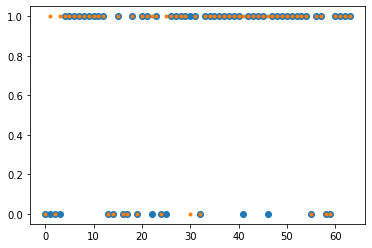

label category index = 0.0
predicted category index = 0
predicted category name = NORMAL


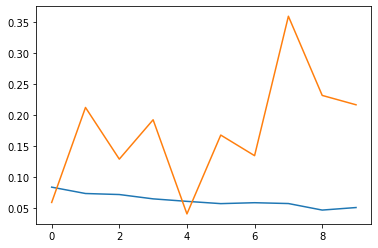

10/10 [==============================] - 5s 502ms/step - loss: 0.5490 - acc: 0.8606
loss= 0.548998236656189
acc= 0.8605769276618958


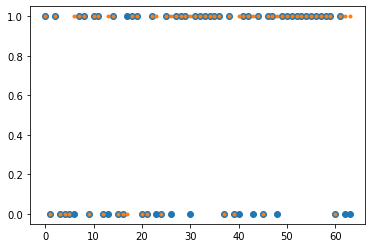

label category index = 1.0
predicted category index = 1
predicted category name = PNEUMONIA


In [ ]:
pred_list = []

for history,model in zip(history_list, model_list):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()


    loss, acc = model.evaluate(test_data_generator)
    print("loss=", loss)
    print("acc=", acc)



    test_x, test_y = test_data_generator.next()
    y_ = model.predict(test_x)
    predicted = np.argmax(y_, axis=-1)
    pred_list.append(predicted)
    
    plt.plot(test_y[:100], "o")
    plt.plot(predicted[:100], '.')
    plt.show()


    custom_labels = list(test_data_generator.class_indices.keys())
    print("label category index =", test_y[0])
    print("predicted category index =", predicted[0])
    print("predicted category name =", custom_labels[predicted[0]])

# AUC-ROC 그리기

In [ ]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

def draw_ROC_and_get_AUC(y_test, y_score, n_classes=2):

  y_test = np.eye(n_classes)[y_test]
  y_score = np.eye(n_classes)[y_score]

  # Plot linewidth.
  lw = 2

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(1)
  plt.plot(fpr["macro"], tpr["macro"],
          label='ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc["macro"]

## AUC-ROC 출력

In [ ]:
test_y = test_y.astype(np.int)

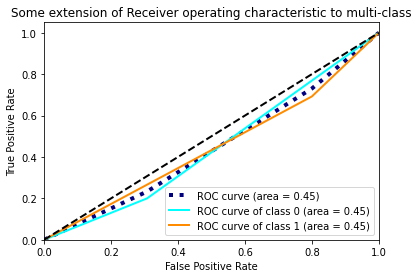

0 번째 model's AUC : 0.4461538461538461


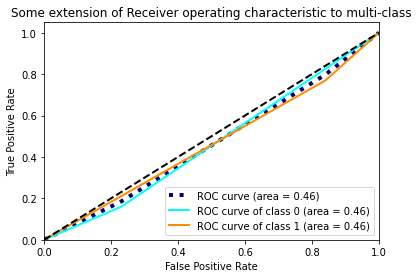

1 번째 model's AUC : 0.4646153846153847


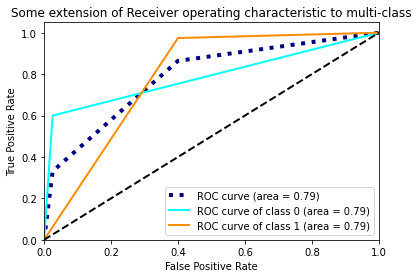

2 번째 model's AUC : 0.7871794871794873


In [ ]:
## ROC 그리기, AUC 출력
for i,predicted in enumerate(pred_list):
    auc_value = draw_ROC_and_get_AUC(test_y, predicted, n_classes=2)
    print(i,"번째 model's AUC :", auc_value)

# Confusion Matrix 출력

0 번째 model!!
              precision    recall  f1-score   support

           0       0.29      0.20      0.24        25
           1       0.57      0.69      0.63        39

    accuracy                           0.50        64
   macro avg       0.43      0.45      0.43        64
weighted avg       0.46      0.50      0.48        64



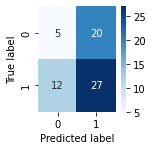

1 번째 model!!
              precision    recall  f1-score   support

           0       0.31      0.16      0.21        25
           1       0.59      0.77      0.67        39

    accuracy                           0.53        64
   macro avg       0.45      0.46      0.44        64
weighted avg       0.48      0.53      0.49        64



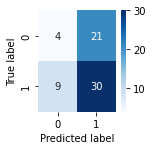

2 번째 model!!
              precision    recall  f1-score   support

           0       0.94      0.60      0.73        25
           1       0.79      0.97      0.87        39

    accuracy                           0.83        64
   macro avg       0.86      0.79      0.80        64
weighted avg       0.85      0.83      0.82        64



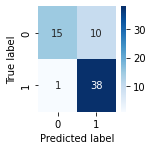

In [ ]:
## Confusion Metric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

for i,predicted in enumerate(pred_list):
    print("="*40)
    print(i,"번째 model!!")
    print("="*40)
    cm = confusion_matrix(test_y, predicted)
    # print(cm)
    print(classification_report(test_y, predicted, target_names=['0','1']))

    figure = plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


n_classes = 2

In [ ]:
test_y = test_y.astype(int)
predicted = predicted.astype(int)
fpr = dict()
tpr = dict()
roc_auc = dict()


test_y_encoded = np.eye(n_classes)[test_y]
predicted_encoded = np.eye(n_classes)[predicted]


for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(test_y_encoded[:, i], predicted_encoded[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(test_y_encoded.ravel(), predicted_encoded.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

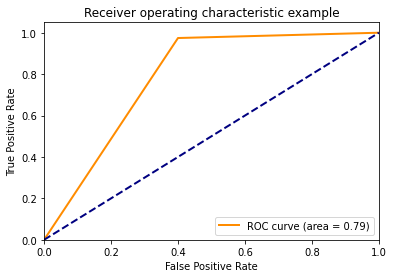

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[n_classes-1], tpr[n_classes-1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[n_classes-1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()